# The Sparks Foundation : Data Science & Business Analytics Internship


# Author: ABHILASHA
## January, 2022.
## TASK 2 : Prediction Using Unsupervised Machine Learning
### From given Iris dataset, to predict optimum number of clusters.
### To represent them visually.


### Importing the required libraries

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn import datasets

### Loading Iris dataset

In [79]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Properties of dataset

In [80]:
iris_df.shape #shape of our data

(150, 4)

In [81]:
iris_df.info() 
# Basic information of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [82]:
iris_df.isnull().sum()
# Checking for presence of null values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [83]:
iris_df.describe() #Description of data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
iris_df.columns # Column names

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

### Scatterplots

#### Scatterplot between Sepal and Petal Lenghts

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

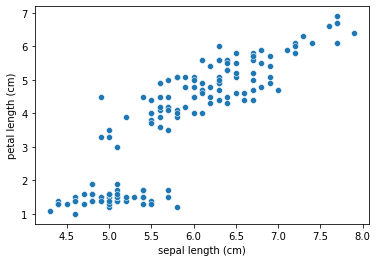

In [35]:
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', data=iris_df)


#### Scatterplot between sepal and petal widths

<AxesSubplot:xlabel='sepal width (cm)', ylabel='petal width (cm)'>

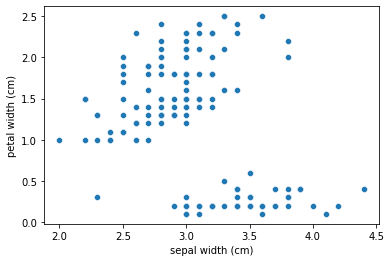

In [36]:
sns.scatterplot(x='sepal width (cm)', y='petal width (cm)', data=iris_df)


### Visualising the Data

C:\Users\Abhilasha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhilasha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


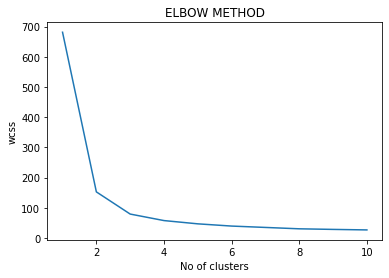

In [113]:
x = iris_df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss =[]
# WCSS is the sum of squared distance between each point and the centroid in a cluster. 
# When we plot the WCSS with the K value, the plot looks like an Elbow

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    # inertia measures how well a dataset was clustered by K-Means 
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('ELBOW METHOD')
plt.xlabel('No of clusters')
plt.ylabel('wcss') # Within cluster sum of squares
plt.show()

#### As elbow is formed at k = 3, therefore implementing K means using k as 3.

### Predicting Number of Clusters using K Means Algorithm

In [111]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [112]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Representing Number of Clusters in graph

In [114]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
# 'k-means++' : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
# max_iterint, default=300 is the Maximum number of iterations of the k-means algorithm for a single run. 
# n_initint, default=10. Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia. 
# It will initialize the centroids for clusters randomly this many times
y_kmeans = kmeans.fit_predict(x)

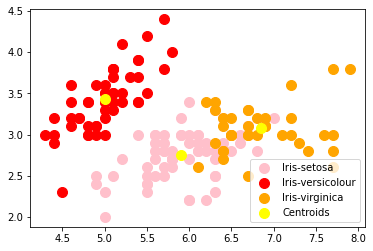

In [116]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'orange', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### Therefore, for given dataset by K means clustering, we have predicted number of clusters as well as represented it visually.